# Import 

In [2]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Date

In [3]:
df2 = pd.read_csv('data/2330.csv')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 17 columns):
Date     1661 non-null object
Open     1661 non-null float64
High     1661 non-null float64
Low      1661 non-null float64
Close    1661 non-null float64
SMA5     1661 non-null float64
SMA10    1661 non-null float64
SMA20    1661 non-null float64
SMA60    1661 non-null float64
Vol      1661 non-null int64
MA5      1661 non-null int64
MA10     1661 non-null int64
DIF      1661 non-null float64
MACD9    1661 non-null float64
OSC      1661 non-null float64
K        1661 non-null object
D        1661 non-null object
dtypes: float64(11), int64(3), object(3)
memory usage: 220.7+ KB


In [5]:
df2['K'] = df2['K'].str.replace('%','').astype('float')
df2['D'] = df2['D'].str.replace('%','').astype('float')
    

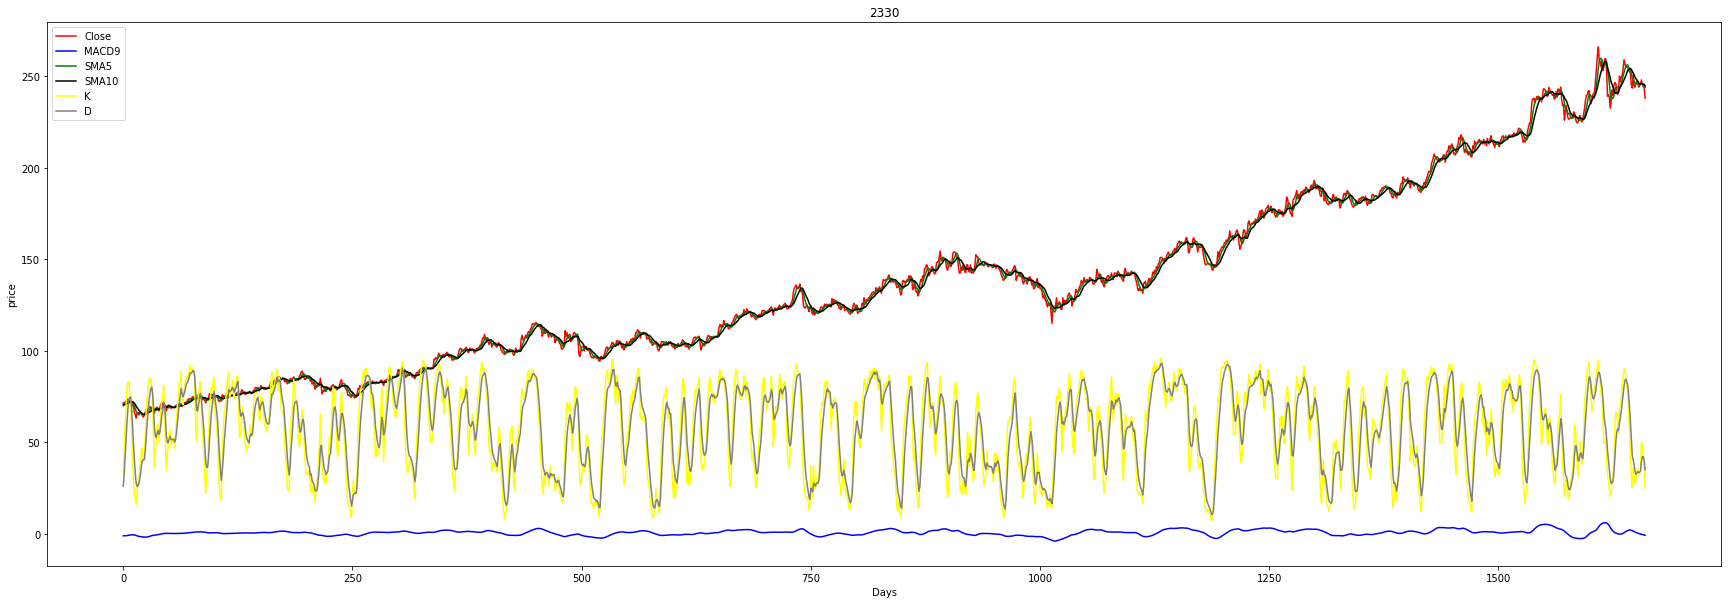

In [6]:
plt.figure(figsize = (30,10))
plt.plot(df2.Close.values , color='red' , label='Close')
plt.plot(df2.MACD9.values , color='blue' , label='MACD9')
plt.plot(df2.SMA5.values , color='green' , label= 'SMA5')
plt.plot(df2.SMA10.values , color='black' , label='SMA10')
plt.plot(df2.K.values , color='yellow' , label='K')
plt.plot(df2.D.values , color='grey' , label='D')

plt.title('2330')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [7]:
df = pd.read_csv('data/2330+Us.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,...,55917,-1.15,-1.00,-0.15,32.35%,26.05%,1326.73,397.41,12.22,8706.17
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,...,54470,-1.04,-1.01,-0.03,46.77%,32.96%,1325.84,395.11,12.47,8717.14
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,...,52998,-0.88,-0.98,0.10,60.35%,42.09%,1343.80,398.88,12.57,8765.32
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,...,51283,-0.76,-0.94,0.18,69.40%,51.19%,1345.02,408.56,12.98,8683.51
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,...,52599,-0.54,-0.86,0.32,79.60%,60.66%,1337.43,403.08,12.75,8794.24


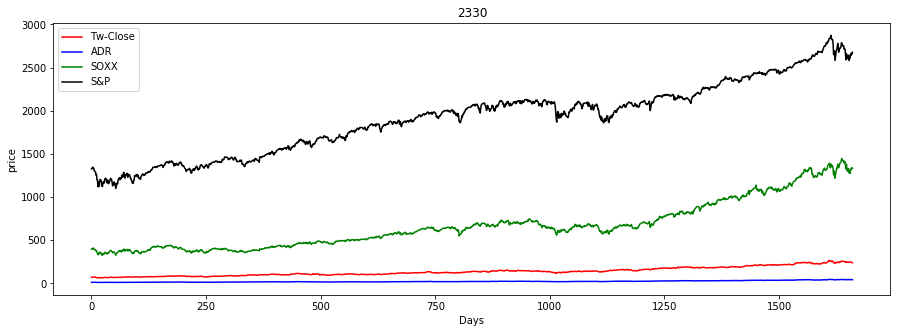

In [9]:
plt.figure(figsize = (15,5))
plt.plot(df.Close.values , color='red' , label='Tw-Close')
plt.plot(df.ADR.values , color='blue' , label='ADR')
plt.plot(df.SOXX.values , color='green' , label= 'SOXX')
plt.plot(df.S_P500.values , color='black' , label='S&P')

plt.title('2330')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 21 columns):
Date         1661 non-null object
Open         1661 non-null float64
High         1661 non-null float64
Low          1661 non-null float64
Close        1661 non-null float64
SMA5         1661 non-null float64
SMA10        1661 non-null float64
SMA20        1661 non-null float64
SMA60        1661 non-null float64
Vol          1661 non-null int64
MA5          1661 non-null int64
MA10         1661 non-null int64
DIF          1661 non-null float64
MACD9        1661 non-null float64
OSC          1661 non-null float64
K            1661 non-null object
D            1661 non-null object
S_P500       1661 non-null float64
SOXX         1661 non-null float64
ADR          1661 non-null float64
TaiwanAll    1661 non-null float64
dtypes: float64(15), int64(3), object(3)
memory usage: 272.6+ KB


In [11]:
import pandas as pd
df = pd.read_csv('data/2330+Us.csv')


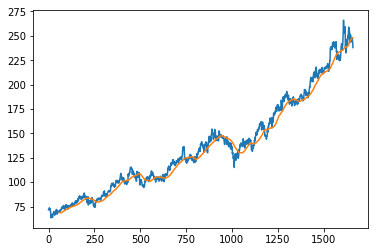

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['Close'].rolling(window=60).mean())


In [13]:
def batch_data( time_steps,batch_size,feature_list):

    df = pd.read_csv('data/2330+Us.csv')

    
    
#     del df['Date']
#     del df['DIF']
#     del df['K']
#     del df['D']
#     del df['MACD9']
#     del df['OSC']
#     del df['SMA60']
#     del df['MA10']
#     del df['MA5']
#     del df['SMA20']
#     del df['SMA10']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)
    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    

     

#     df['label']=(df['Close'].shift(-sd)-df['Close']>=0).astype('int')
    df['label']=(df['Close'].rolling(window=14).mean()-df['Close']>=0.05).astype('int')

    Y =df['label']
    Y = np_utils.to_categorical(Y)
    #first time train
    #X = df[['Vol','Open','High','Low','Close']]
    # acc 65
    
    #second
    #X = df[['Vol','Open','High','Low','Close','MA5']]
    
    #third
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10']]
    
    #4
    X = df[feature_list]
    
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [14]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,...,55917,-1.15,-1.00,-0.15,32.35%,26.05%,1326.73,397.41,12.22,8706.17
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,...,54470,-1.04,-1.01,-0.03,46.77%,32.96%,1325.84,395.11,12.47,8717.14
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,...,52998,-0.88,-0.98,0.10,60.35%,42.09%,1343.80,398.88,12.57,8765.32
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,...,51283,-0.76,-0.94,0.18,69.40%,51.19%,1345.02,408.56,12.98,8683.51
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,...,52599,-0.54,-0.86,0.32,79.60%,60.66%,1337.43,403.08,12.75,8794.24


In [15]:
df.shape

(1661, 21)

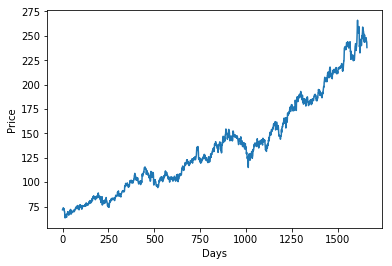

In [16]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [17]:
batch_size= 128
LR= 0.001
epoch= 1000
input_size= 6
time_steps= 6


In [18]:
#feature_list_try = ['SMA5', 'SMA10', 'SMA20',
       #'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR' ,'MA5','ADR']
feature_list_try = ['TaiwanAll','SMA5']

new feature:  TaiwanAll


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(128, 6, 6..., return_sequences=True, stateful=False, units=256)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, stateful=False, units=128)`


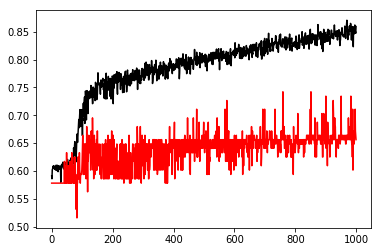

1408/1408 [==============================] - 0s 35us/step
train_score: [0.30616373094645416, 0.8579545454545454]
128/128 [==============================] - 0s 40us/step
test_score: [1.9992635250091553, 0.65625]
new feature:  SMA5


KeyboardInterrupt: 

In [19]:

for i in range(len(feature_list_try)):
    feature_list = ['Open', 'High', 'Low', 'Close','Vol']
    feature_list.append(feature_list_try[i])
    input_size = len(feature_list)
    print('new feature: ',feature_list_try[i])
    model =Sequential()
    model.add(LSTM(
                batch_input_shape=(batch_size,time_steps,input_size),
                output_dim=256,
                return_sequences=True,
                stateful=False,
            ))
    model.add(Dropout(0.4))
    model.add(LSTM(
            output_dim=128,
                return_sequences=False,
                stateful=False,
             ))
    model.add(Dropout(0.4))
    
    model.add(Dense(512))
    model.add(Dropout(0.4))
    model.add(Dense(256))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='softmax'))
    adam = Adam(LR)
    #     model.summary()
    model.compile(optimizer=adam,
                      loss='categorical_crossentropy',metrics=['accuracy'])
    X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,batch_size,feature_list)
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
    plt.plot(train_history.history['acc'],color='black')
    plt.plot(train_history.history['val_acc'],color='red')
    plt.show()

    score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
    print('train_score:', score)
    score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
    print('test_score:', score)

In [ ]:


feature_list = ['Open', 'High', 'Low', 'Close','Vol']

model =Sequential()
model.add(LSTM(
            batch_input_shape=(batch_size,time_steps,5),
            output_dim=256,
            return_sequences=True,
            stateful=False,
        ))
model.add(Dropout(0.4))
model.add(LSTM(
        output_dim=128,
            return_sequences=False,
            stateful=False,
         ))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))
adam = Adam(LR)
#     model.summary()
model.compile(optimizer=adam,
                  loss='categorical_crossentropy',metrics=['accuracy'])
X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,batch_size,feature_list)
train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
plt.plot(train_history.history['acc'],color='black')
plt.plot(train_history.history['val_acc'],color='red')
plt.show()

score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
print('train_score:', score)
score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
print('test_score:', score)

In [ ]:
print(len(train_history.history['acc']))

In [ ]:

new_h =[]
new_h_val=[]
for i in range(0,len(train_history.history['acc']),100):
    new_0h.append(train_history.history['acc'][i])
    new_h_val.append(train_history.history['val_acc'][i])
    

In [ ]:
plt.plot(new_h)
plt.plot(new_h_val)

plt.xlabel('epoch')
plt.ylabel('acc')

In [ ]:
df = pd.read_csv('data/2330+Us.csv')
df_val = df[-batch_size:]

In [ ]:
df_val.shape

In [ ]:
predictions = Y_t_batch_test[:,1]

In [ ]:
df_val.iloc[0]

In [ ]:
predictions.shape

In [ ]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
    if holding == 0:
        if prediction ==1 and (K<D):
            print(K)
            print('----')
            print(D)
            print('++++')
            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.03 or (D<K):
#                 print((buy_i-i))
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

In [297]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
#     MACD9 = float(df_val.iloc[i]['MACD9']
   
    if holding == 0:
        if prediction ==1  and (K<40 and D<40) :
            print('----')
            print(K,D)
            
            

            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.03 or i-buy_i>14 or ( K>60 and D>60) :
                print('++++++')
                print(K,D)
#                 print((buy_i-i))
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

----
28.55 38.63
++++++
76.32 62.97
----
20.42 37.31
++++++
29.5 31.44
----
25.97 29.62
++++++
45.57 44.18
----
24.83 35.02
++++++
59.45 41.99
----
32.11 37.74


In [1]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)-14):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
    MACD9 = float(df_val.iloc[i]['MACD9'])
   
    if holding == 0:
        if prediction ==1 and MACD9 < 1 :
            print('----')
            print(K,D)
            
            

            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.03 or i-buy_i>14 and  MACD9 > 0 :
                print('++++++')
                print(K,D)
#                 print((buy_i-i))
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

NameError: name 'predictions' is not defined

In [298]:
sum(profit)

19.0

In [299]:
trade_record

[[237.5, 28, 'BUY'],
 [244.0, 35, 'SELL'],
 [226.0, 39, 'BUY'],
 [234.0, 41, 'SELL'],
 [229.5, 42, 'BUY'],
 [226.0, 57, 'SELL'],
 [238.5, 88, 'BUY'],
 [246.5, 94, 'SELL'],
 [245.0, 115, 'BUY']]

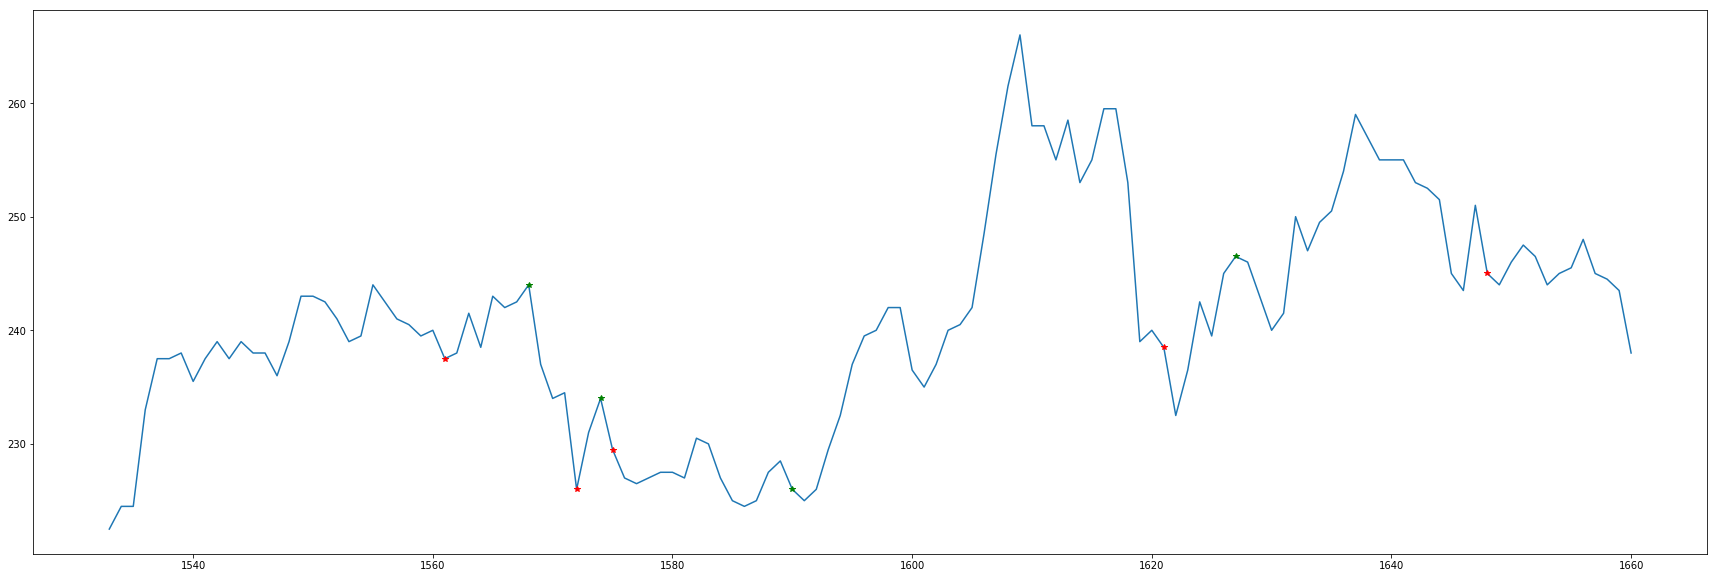

In [300]:
plt.figure(figsize = (30,10))
plt.plot(df_val['Close'])
for i in trade_record:
    x=i[1]+1533
    y = i[0]
    action = i[2]
    if action=='BUY':
        plt.plot(x,y,color='red',marker='*')
    else:
        plt.plot(x,y,color='green',marker='*')